<a href="https://colab.research.google.com/github/RenanBarreto4/TutorialNotebooks/blob/master/MatplotlibNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib Notebook
### Feito por: Renan Barreto
### GitHub: https://github.com/RenanBarreto4
### Documentação: https://matplotlib.org/api/pyplot_api.html
### Baseado em: https://learn.datacamp.com/ 

In [ ]:
#importando biblioteca matplotlib para visualização de dados
import matplotlib.pyplot as plt

In [ ]:
#importando outras bibliotecas auxiliares
import pandas as pd
import numpy as np

In [ ]:
#importando alguns datasets
ufo = pd.read_csv('http://bit.ly/uforeports')              #
drinks = pd.read_csv('http://bit.ly/drinksbycountry')      #consumo de álcool por país
titanic = pd.read_csv('http://bit.ly/kaggletrain')         #passageiros do titanic
imdb = pd.read_csv('http://bit.ly/imdbratings')            #ranking de filmes
stocks = pd.read_csv('http://bit.ly/smallstocks')          #ações da bolsa

In [ ]:
#verificando dataset drinks
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


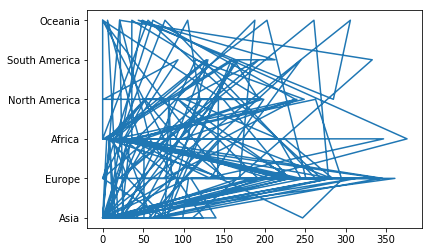

In [ ]:
#por padrão ele faz um gráfico de linhas (mesmo sem sentido)
plt.plot(drinks.beer_servings, drinks.continent)
plt.show()

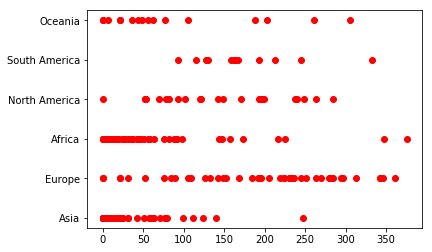

In [ ]:
#fazendo um gráfico de pontos
plt.scatter(drinks.beer_servings, drinks.continent, color='r') #argumento color troca a cor
plt.show()

In [ ]:
#verificando dataset
stocks.head()

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT
5,2016-10-04,31.35,18460400,CSCO
6,2016-10-05,57.64,16726400,MSFT
7,2016-10-05,31.59,11808600,CSCO
8,2016-10-05,113.05,21453100,AAPL


In [ ]:
#criando sub datasets para plotar
SA = stocks.loc[stocks.Symbol=='AAPL',:]
SM = stocks.loc[stocks.Symbol=='MSFT',:]
SC = stocks.loc[stocks.Symbol=='CSCO',:]

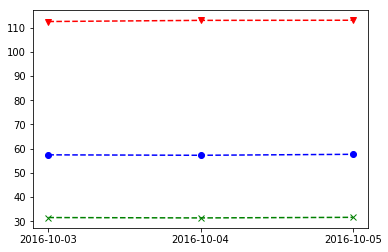

In [ ]:
#alterando argumentos do gráfico, como tipo de traço, tipo de marcação e cor
plt.plot(SA.Date, SA.Close, linestyle = '--', marker = 'v', color = 'r')
plt.plot(SM.Date, SM.Close, linestyle = '--', marker = 'o', color = 'g')
plt.plot(SC.Date, SC.Close, linestyle = '--', marker = 'x', color = 'b')
plt.show()

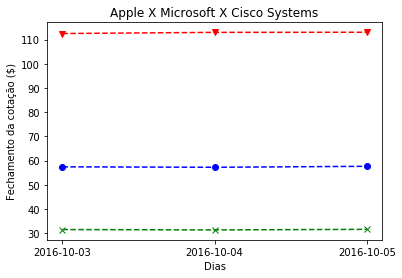

In [ ]:
#nomeando eixos e título
plt.plot(SA.Date, SA.Close, linestyle = '--', marker = 'v', color = 'r')
plt.plot(SA.Date, SM.Close, linestyle = '--', marker = 'o', color = 'g')
plt.plot(SA.Date, SC.Close, linestyle = '--', marker = 'x', color = 'b')
plt.xlabel('Dias')
plt.ylabel('Fechamento da cotação ($)')
plt.title('Apple X Microsoft X Cisco Systems')
plt.show()

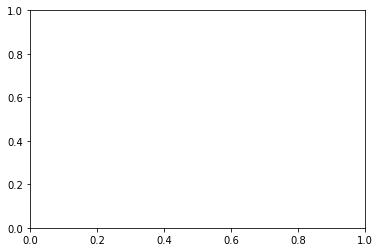

In [ ]:
#criando eixos
fig, ax = plt.subplots()
plt.show() #plt.show() é o comando para mostrar os gráficos

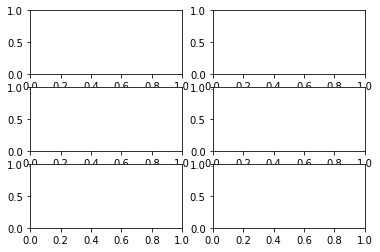

In [ ]:
#pode alterar o número de gráficos por linha e coluna
fig, ax = plt.subplots(3,2)  #3 linhas e 2 colunas
plt.show()

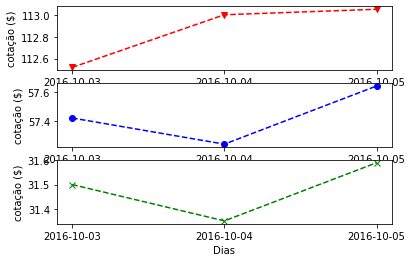

In [ ]:
#adicionando um subplot para cada variável
fig, ax = plt.subplots(3,1)   #gerando 3 gráficos em uma coluna
ax[0].plot(SA.Date, SA.Close, linestyle = '--', marker = 'v', color = 'r') #as [] servem para escolher qual gráfico dos 3 quer colocar 
ax[1].plot(SM.Date, SM.Close, linestyle = '--', marker = 'o', color = 'g')
ax[2].plot(SC.Date, SC.Close, linestyle = '--', marker = 'x', color = 'b')
ax[2].set_xlabel('Dias')              #quando se utiliza fig e ax, é necessário o set_  para nomear o xlabel e ylabel
ax[0].set_ylabel('cotação ($)')     #dando nome para o eixo y
ax[1].set_ylabel('cotação ($)')
ax[2].set_ylabel('cotação ($)')
plt.show()

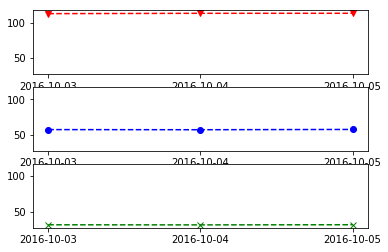

In [ ]:
#o argumento sharey = True faz todos os intervalos do eixo Y serem iguais (o mesmo vale para sharex=True)
fig, ax = plt.subplots(3,1, sharey=True)
ax[0].plot(SA.Date, SA.Close, linestyle = '--', marker = 'v', color = 'r')
ax[1].plot(SA.Date, SM.Close, linestyle = '--', marker = 'o', color = 'g')
ax[2].plot(SA.Date, SC.Close, linestyle = '--', marker = 'x', color = 'b')
plt.show()

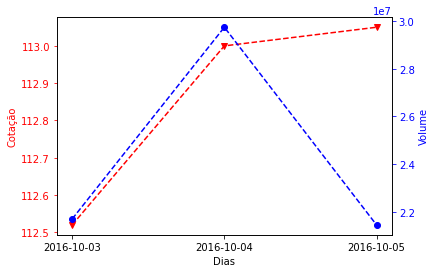

In [ ]:
#fazendo gráficos com escalas diferentes em um mesmo gráfico
fig, ax = plt.subplots()
ax.plot(SA.Date, SA.Close, linestyle = '--', marker = 'v', color = 'red')   #gerando o primeiro dado
ax.set_xlabel('Dias')    #adicioando nome ao eixo x
ax.set_ylabel('Cotação', color = 'red')  #adicionando e colorindo o título do eixo
ax.tick_params('y', colors = 'red')   #colorindo os ticks do eixo y
ax2 = ax.twinx()    #copia o plot para usar em cima
ax2.plot(SA.Date, SA.Volume, linestyle = '--', marker = 'o', color = 'b')  #gerando o segundo dado
ax2.set_ylabel('Volume', color = 'blue')  #adicionando e colorindo o título do eixo
ax2.tick_params('y', colors = 'blue')  #colorindo os ticks do eixo y
plt.show()

In [ ]:
#criando função para plotar séries temporais
def plot_time_series(axes, x, y, color, xlabel, ylabel, marker='o', linestyle='--'):   #função com paramentros default
  axes.plot(x, y, color=color, marker=marker, linestyle=linestyle)  #gerando o gráfico
  axes.set_xlabel(xlabel)  #dando nome ao eixo x
  axes.set_ylabel(ylabel, color=color) #adicionando e colorindo o título do eixo
  axes.tick_params('y', colors=color)  #colorindo os ticks do eixo y

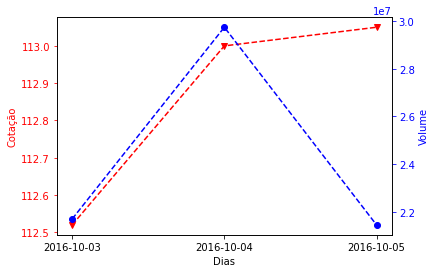

In [ ]:
#plotando usando a função
fig, ax = plt.subplots()
plot_time_series(ax, SA.Date, SA.Close, 'red', 'Dias', 'Cotação', 'v')
ax2 = ax.twinx()
plot_time_series(ax2, SA.Date, SA.Volume, 'blue', 'Dias', 'Volume')
plt.show()

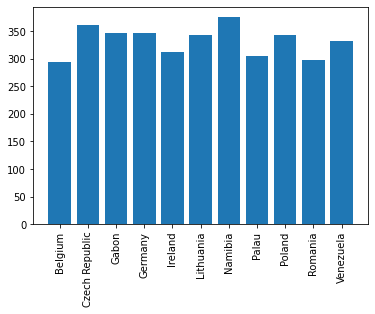

In [ ]:
#gráfico de barras
fig, ax = plt.subplots()   #criando eixos
beer290 = drinks[drinks.beer_servings>290]   #selecionando os países com beer_servings>290 para diminuir a quantidade
ax.bar(beer290.country, beer290.beer_servings)   #gerando o bar plot
ax.set_xticklabels(beer290.country, rotation=90)    #rotacionando os ticks do eixo x
plt.show()

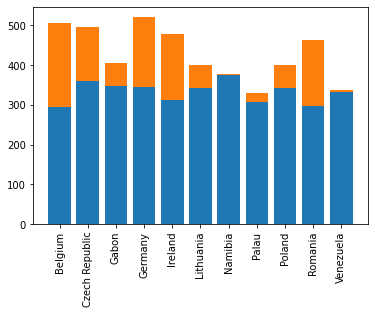

In [ ]:
#gráfico de barras com 2 variáveis
fig, ax = plt.subplots()   #criando eixos
beer290 =drinks[drinks.beer_servings>290]   #selecionando os países com beer_servings>290 para diminuir a quantidade
ax.set_xticklabels(beer290.country, rotation=90)    #rotacionando os ticks do eixo x
ax.bar(beer290.country, beer290.beer_servings)   #gerando o bar plot
ax.bar(beer290.country, beer290.wine_servings, bottom=beer290.beer_servings) #adicionando a segunda variável
plt.show()

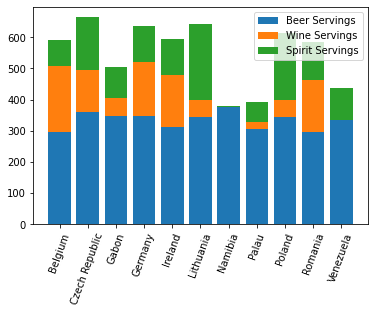

In [ ]:
#gráfico de barras com 3 variáveis e adicionando legendas
fig, ax = plt.subplots()   #criando eixos
beer290 =drinks[drinks.beer_servings>290]   #selecionando os países com beer_servings>290 para diminuir a quantidade
ax.set_xticklabels(beer290.country, rotation=70)    #rotacionando os ticks do eixo x
ax.bar(beer290.country, beer290.beer_servings, label='Beer Servings')   #gerando o bar plot
ax.bar(beer290.country, beer290.wine_servings, bottom=beer290.beer_servings, label='Wine Servings') #adicionando a segunda variável
ax.bar(beer290.country, beer290.spirit_servings, bottom=beer290.beer_servings + beer290.wine_servings, label='Spirit Servings') #adicionando a terceira variável
ax.legend() #adicionando junto com os labels a legenda
plt.show()